# Linear Transformations - Lab

## Introduction

In this lab, you'll practice your linear transformation skills!

## Objectives

You will be able to:

* Determine if a linear transformation would be useful for a specific model or set of data
* Identify an appropriate linear transformation technique for a specific model or set of data
* Apply linear transformations to independent and dependent variables in linear regression
* Interpret the coefficients of variables that have been transformed using a linear transformation

## Ames Housing Data

Let's look at the Ames Housing data, where each record represents a home sale:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

ames = pd.read_csv('ames.csv', index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


We'll use this subset of features. These are specifically the _continuous numeric_ variables, which means that we'll hopefully have meaningful mean values.

From the data dictionary (`data_description.txt`):

```
LotArea: Lot size in square feet

MasVnrArea: Masonry veneer area in square feet

TotalBsmtSF: Total square feet of basement area

GrLivArea: Above grade (ground) living area square feet

GarageArea: Size of garage in square feet
```

In [3]:
ames = ames[[
    "LotArea",
    "MasVnrArea",
    "TotalBsmtSF",
    "GrLivArea",
    "GarageArea",
    "SalePrice"
]].copy()
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


We'll also drop any records with missing values for any of these features:

In [4]:
ames.dropna(inplace=True)
ames

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea,SalePrice
Id,,,,,,
1,8450,196.0,856,1710,548,208500
2,9600,0.0,1262,1262,460,181500
3,11250,162.0,920,1786,608,223500
4,9550,0.0,756,1717,642,140000
5,14260,350.0,1145,2198,836,250000
...,...,...,...,...,...,...
1456,7917,0.0,953,1647,460,175000
1457,13175,119.0,1542,2073,500,210000
1458,9042,0.0,1152,2340,252,266500


And plot the distributions of the un-transformed variables:

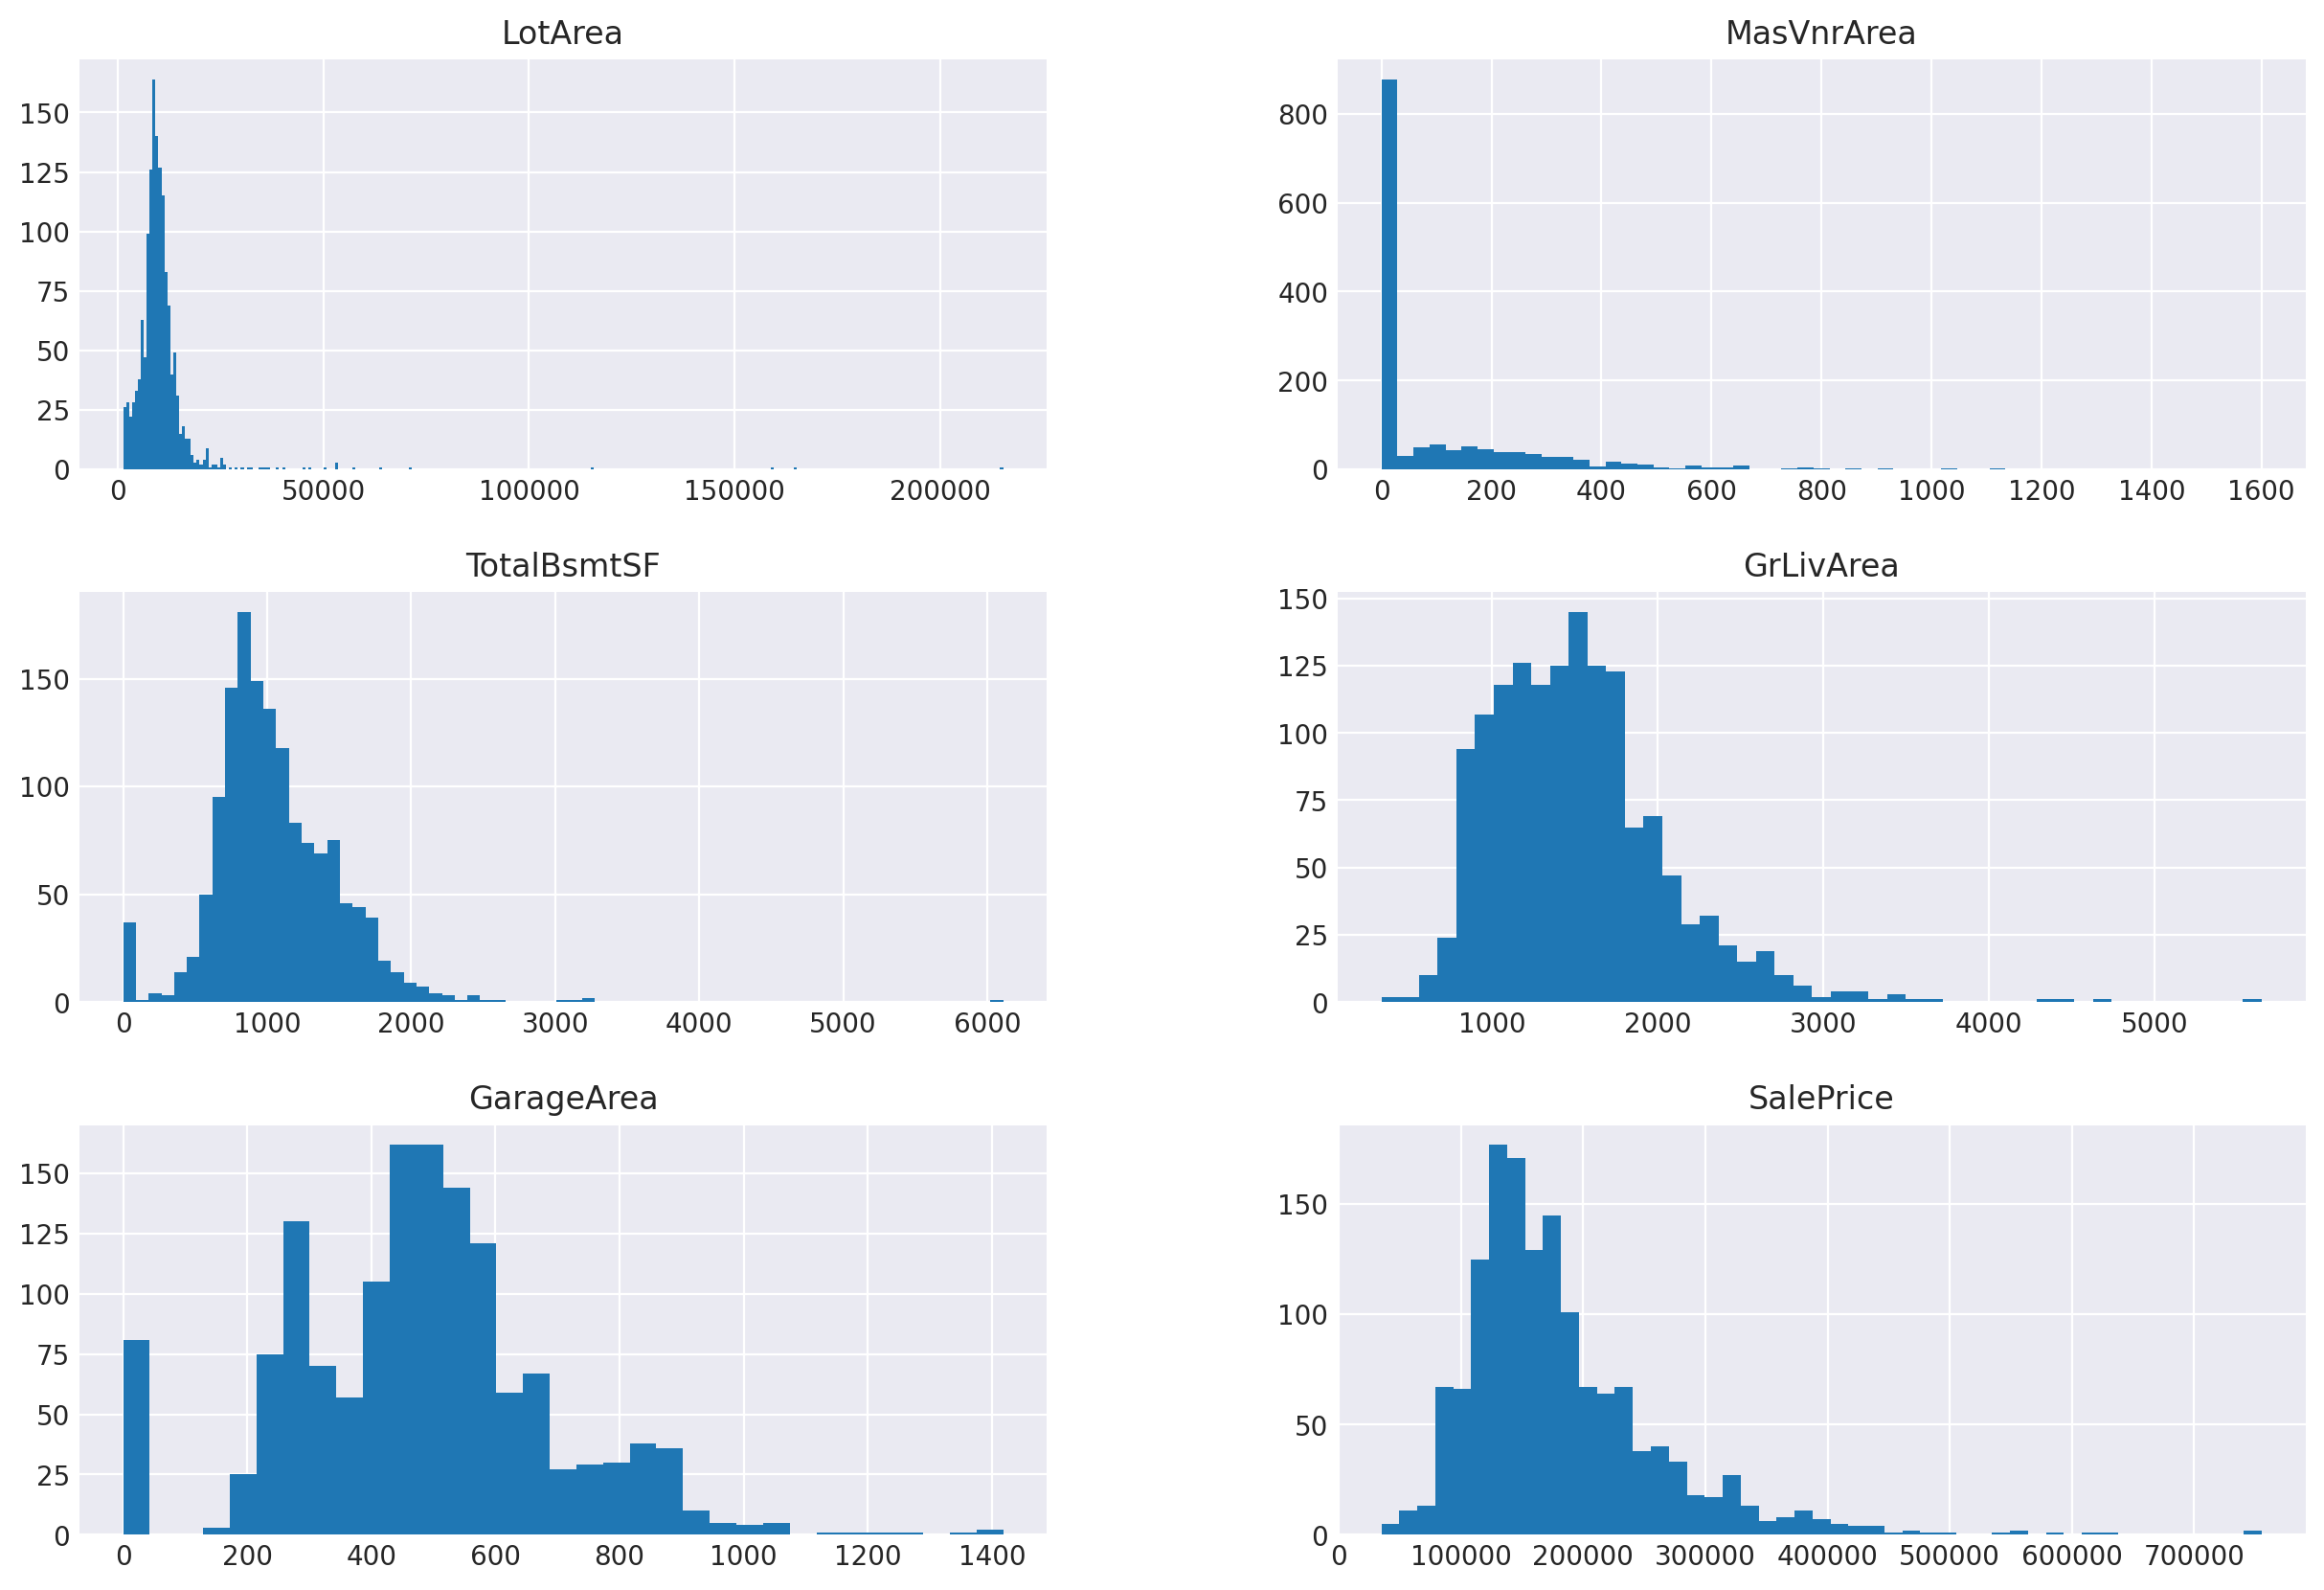

In [5]:
ames.hist(figsize=(15,10), bins="auto");

## Step 1: Build an Initial Linear Regression Model

`SalePrice` should be the target, and all other columns in `ames` should be predictors.

In [6]:
# Your code here - build a linear regression model with un-transformed features
import statsmodels.api as sm

y = ames['SalePrice']
X_baseline = ames.drop(columns=['SalePrice'])

model = sm.OLS(y, sm.add_constant(X_baseline))
results = model.fit()

In [7]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:01:50   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

## Step 2: Evaluate Initial Model and Interpret Coefficients

Describe the model performance overall and interpret the meaning of each predictor coefficient. Make sure to refer to the explanations of what each feature means from the data dictionary!

In [8]:
# Your written answer here
"""
The model is significant with a p-value of 0.00
The model accounts for about 68% of the variance in SalePrice
The intercept is -1.525e+04 meaning a house with a LotArea of ZERO would theoretically cost about -$15,250
All of our variables are statistically significant at the 0.05 alpha level
An increase of 1 sf of LotArea increases SalePrice by about $0.26
An increase of 1 sf of MasVnrArea increases SalePrice by about $55
An increase of 1 sf of TotalBsmtSF increases SalePrice by about $44
An increase of 1 sf of GrLivArea increases SalePrice by about $64
An increase of 1 sf of GarageArea increases SalePrice by about $93
"""

'\nThe model is significant with a p-value of 0.00\nThe model accounts for about 68% of the variance in SalePrice\nThe intercept is -1.525e+04 meaning a house with a LotArea of ZERO would theoretically cost about -$15,250\nAll of our variables are statistically significant at the 0.05 alpha level\nAn increase of 1 sf of LotArea increases SalePrice by about $0.26\nAn increase of 1 sf of MasVnrArea increases SalePrice by about $55\nAn increase of 1 sf of TotalBsmtSF increases SalePrice by about $44\nAn increase of 1 sf of GrLivArea increases SalePrice by about $64\nAn increase of 1 sf of GarageArea increases SalePrice by about $93\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The model overall is statistically significant and explains about 68% of the variance in sale price.

The coefficients are all statistically significant.

* `LotArea`: for each additional square foot of lot area, the price increases by about \\$0.26
* `MasVnrArea`: for each additional square foot of masonry veneer, the price increases by about \\$55
* `TotalBsmtSF`: for each additional square foot of basement area, the price increases by about \\$44
* `GrLivArea`: for each additional square foot of above-grade living area, the price increases by about \\$64
* `GarageArea`: for each additional square foot of garage area, the price increases by about \\$93

</details>

## Step 3: Express Model Coefficients in Metric Units

Your stakeholder gets back to you and says this is great, but they are interested in metric units.

Specifically they would like to measure area in square meters rather than square feet.

Report the same coefficients, except using square meters. You can do this by building a new model, or by transforming just the coefficients.

The conversion you can use is **1 square foot = 0.092903 square meters**.

In [9]:
# Your code here - building a new model or transforming coefficients
# from initial model so that they are in square meters
X_metric = X_baseline.copy()
X_metric = X_metric * 0.092903
X_metric

,LotArea,MasVnrArea,TotalBsmtSF,GrLivArea,GarageArea
Id,,,,,
1,785.030350,18.208988,79.524968,158.864130,50.910844
2,891.868800,0.000000,117.243586,117.243586,42.735380
3,1045.158750,15.050286,85.470760,165.924758,56.485024
4,887.223650,0.000000,70.234668,159.514451,59.643726
5,1324.796780,32.516050,106.373935,204.200794,77.666908
...,...,...,...,...,...
1456,735.513051,0.000000,88.536559,153.011241,42.735380
1457,1223.997025,11.055457,143.256426,192.587919,46.451500
1458,840.028926,0.000000,107.024256,217.393020,23.411556


In [10]:
metric_model = sm.OLS(y, sm.add_constant(X_metric))
metric_results = metric_model.fit()
print(metric_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:01:50   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.525e+04   4145.934     -3.677      

In [11]:
# Your written answer here
"""
The intercept is unchanged as are the p-value of the model and the Adj r-squared
An increase of 1 sq meter in LotArea now increases SalePrice by $2.76
An increase of 1 sq meter in MasVnrArea now increases SalePrice by $593
An increase of 1 sq meter in TotalBsmtSF now increases SalePrice by $475
An increase of 1 sq meter in GrLivArea now increases SalePrice by $687
An increase of 1 sq meter in GarageArea now increases SalePrice by $1006
"""

'\nThe intercept is unchanged as are the p-value of the model and the Adj r-squared\nAn increase of 1 sq meter in LotArea now increases SalePrice by $2.76\nAn increase of 1 sq meter in MasVnrArea now increases SalePrice by $593\nAn increase of 1 sq meter in TotalBsmtSF now increases SalePrice by $475\nAn increase of 1 sq meter in GrLivArea now increases SalePrice by $687\nAn increase of 1 sq meter in GarageArea now increases SalePrice by $1006\n'

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

* `LotArea`: for each additional square meter of lot area, the price increases by about \\$2.76
* `MasVnrArea`: for each additional square meter of masonry veneer, the price increases by about \\$593
* `TotalBsmtArea`: for each additional square meter of basement area, the price increases by about \\$475
* `GrLivArea`: for each additional square meter of above-grade living area, the price increases by about \\$687
* `GarageArea`: for each additional square meter of garage area, the price increases by about \\$1,006

</details>

## Step 4: Center Data to Provide an Interpretable Intercept

Your stakeholder is happy with the metric results, but now they want to know what's happening with the intercept value. Negative \\$17k for a home with zeros across the board...what does that mean?

Center the data so that the mean is 0, fit a new model, and report on the new intercept.

(It doesn't matter whether you use data that was scaled to metric units or not. The intercept should be the same either way.)

In [12]:
# Your code here - center data
X_centered = X_metric.copy()

for col in X_centered.columns:
    X_centered[col] = X_centered[col] - X_centered[col].mean()

In [13]:
# Your code here - build a new model
model_centered = sm.OLS(y, sm.add_constant(X_centered))
results_centered = model_centered.fit()

print(results_centered.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:02:33   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      

In [ ]:
# Your written answer here - interpret the new intercept
"""
For a house with the average LotArea, MasVnrArea, TotalBsmtSF, GrLivArea, and GarageArea,
the price would be about $180,600
"""

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The new intercept is about \\$181k. This means that a home with average lot area, average masonry veneer area, average total basement area, average above-grade living area, and average garage area would sell for about \\$181k.

</details>

## Step 5: Identify the "Most Important" Feature

Finally, either build a new model with transformed coefficients or transform the coefficients from the Step 4 model so that the most important feature can be identified.

Even though all of the features are measured in area, they are different kinds of area (e.g. lot area vs. masonry veneer area) that are not directly comparable as-is. So apply **standardization** (dividing predictors by their standard deviations) and identify the feature with the highest standardized coefficient as the "most important".

In [14]:
# Your code here - building a new model or transforming coefficients
# from centered model so that they are in standard deviations
X_standardized = X_metric.copy()

for col in X_standardized:
    X_standardized[col] = (X_standardized[col] - X_standardized[col].mean()) \
                            / X_standardized[col].std()
    
model_standardized = sm.OLS(y, sm.add_constant(X_standardized))
results_standardized = model_standardized.fit()

print(results_standardized.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     603.0
Date:                Mon, 14 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:09:49   Log-Likelihood:                -17622.
No. Observations:                1452   AIC:                         3.526e+04
Df Residuals:                    1446   BIC:                         3.529e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.806e+05   1186.695    152.200      

In [ ]:
# Your written answer here - identify the "most important" feature
"""
The most important feature is GrLivArea with a coef of about $33,560
"""

<details>
    <summary style="cursor: pointer"><b>Answer (click to reveal)</b></summary>

The feature with the highest standardized coefficient is `GrLivArea`. This means that above-grade living area is most important.

</details>

## Summary
Great! You've now got some hands-on practice transforming data and interpreting the results!